In [38]:
# default_exp app

In [16]:
pip install -Uqq gradio

Note: you may need to restart the kernel to use updated packages.


In [17]:
# export
from fastai.vision.all import *
import gradio as gr

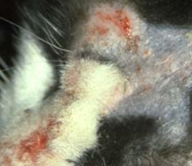

In [18]:
im = PILImage.create('leprocy3.png')
im.to_thumb(192)

In [19]:
# export

learn=load_learner('Cat_disease_resnet50_7.pkl')

In [20]:
learn.predict(im)

('Cat with leprocy',
 tensor(1),
 tensor([1.5171e-01, 7.7923e-01, 3.4132e-02, 3.4901e-02, 2.6754e-05]))

In [21]:
from fastai.vision.all import load_learner

# Get the class names
class_names = learn.dls.vocab

# Print the class names
print(class_names)


['Cat with Scabies', 'Cat with leprocy', 'Cat with ringworm', 'cat with Feline Acne', 'cat with fleas']


In [22]:
# export

Categories = ('Cat with Scabies', 'Cat with leprocy', 'Cat with ringworm', 'cat with Feline Acne', 'cat with fleas')
def classify_image(img):
    # Convert to PIL Image if not already
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)
    img = img.resize((192, 192))  # Resize the image to the required size
    pred, idx, prob = learn.predict(img)  # Assuming learn.predict works on PIL images
    return dict(zip(Categories, map(float, prob)))

In [23]:
classify_image(im)

{'Cat with Scabies': 0.6214474439620972,
 'Cat with leprocy': 0.32039162516593933,
 'Cat with ringworm': 0.03500301390886307,
 'cat with Feline Acne': 0.023010453209280968,
 'cat with fleas': 0.00014739730977453291}

In [25]:
# export

import gradio as gr

image = gr.Image()
label = gr.Label()
examples = [["Fleas2.png"], ["felan acne1.png"],["leprocy3.png"],["Scabbies_1.png"]]  # Examples should be in a nested list

# Setting up the Gradio interface
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples, flagging_dir="/tmp/flagged")

# Launching the interface
intf.launch(inline=False)


Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


In [33]:
pip install --upgrade nbdev

Note: you may need to restart the kernel to use updated packages.


In [41]:
from nbdev.export import notebook2script

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/Users/user/anaconda3/lib/python3.10/site-packages/nbdev/export.py)

InterpolationMissingOptionError: Bad value substitution: option 'lib_name' in section 'DEFAULT' contains an interpolation key 'repo' which is not a valid option name. Raw value: '%(repo)s'